# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#pprint
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city,
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)
    

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | okha
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | termas de rio hondo
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | happy valley-goose bay
Processing Record 10 of Set 1 | nemuro
Processing Record 11 of Set 1 | priozersk
Processing Record 12 of Set 1 | cambria
Processing Record 13 of Set 1 | chon daen
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | susuman
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | birao
Processing Record 21 of Set 1 | manalongon
Processing Record 22 of Set 1 | ushuaia
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,okha,53.5739,142.9478,15.93,88,100,3.76,RU,1724261344
1,invercargill,-46.4000,168.3500,3.34,92,42,0.45,NZ,1724261345
2,termas de rio hondo,-27.4998,-64.8604,14.25,74,100,2.71,AR,1724261346
3,yellowknife,62.4560,-114.3525,11.90,83,100,8.75,CA,1724261347
4,isafjordur,66.0755,-23.1240,7.02,81,75,8.75,IS,1724261348


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okha,53.5739,142.9478,15.93,88,100,3.76,RU,1724261344
1,invercargill,-46.4000,168.3500,3.34,92,42,0.45,NZ,1724261345
2,termas de rio hondo,-27.4998,-64.8604,14.25,74,100,2.71,AR,1724261346
3,yellowknife,62.4560,-114.3525,11.90,83,100,8.75,CA,1724261347
4,isafjordur,66.0755,-23.1240,7.02,81,75,8.75,IS,1724261348


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

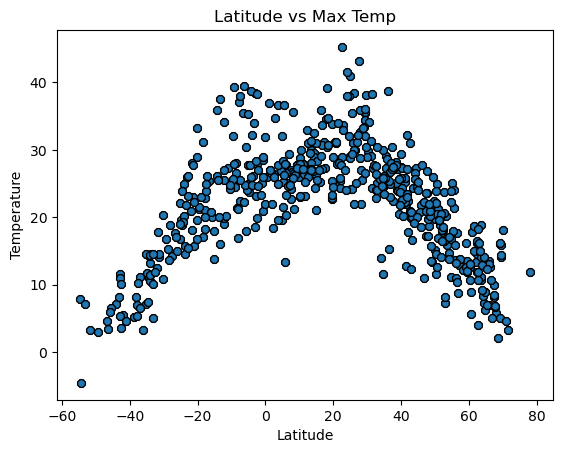

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker='8',edgecolors='black')
# Incorporate the other graph properties
plt.title('Latitude vs Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

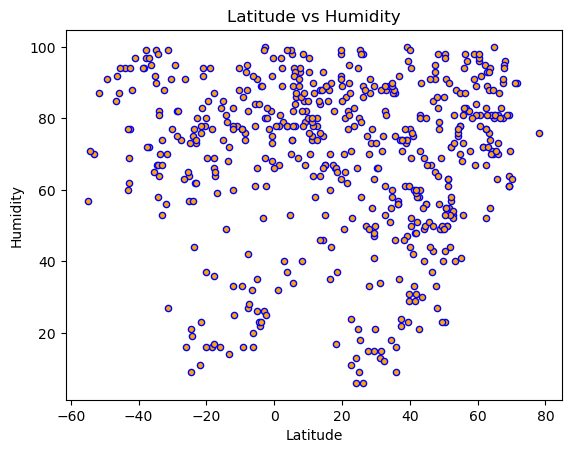

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity',marker='o', edgecolors='blue',xlabel='Latitude',ylabel='Humidity',title='Latitude vs Humidity',color='orange')

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

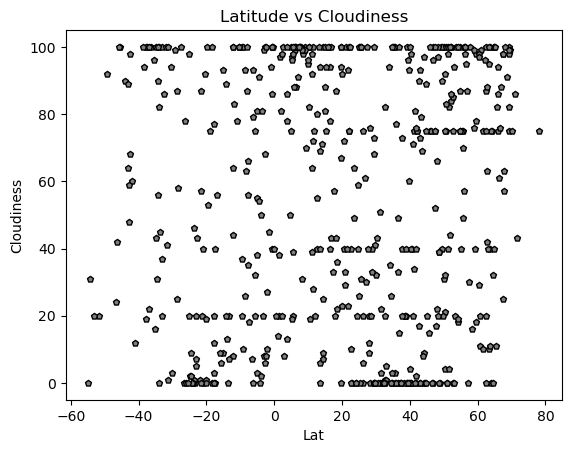

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind='scatter',x='Lat',y='Cloudiness',color='grey',edgecolors='black',marker='p')

plt.title('Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

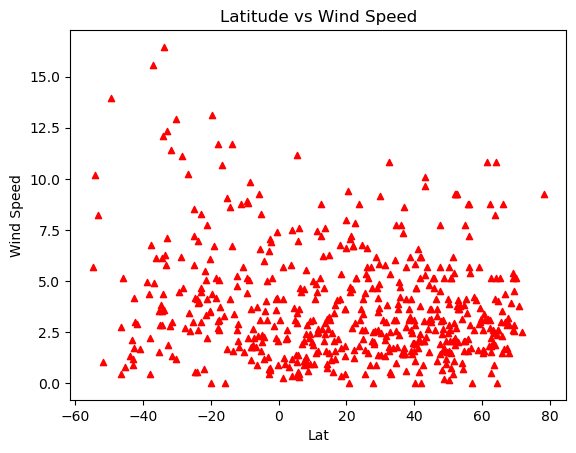

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter',x='Lat',y='Wind Speed', marker='^', color='red')

# Incorporate the other graph properties
plt.title('Latitude vs Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def get_regress(x,y, title, xlabel, ylabel):
   plt.scatter(x=x,y=y)
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
   regress_values = x * slope + intercept
   line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
   plt.plot(x,regress_values, color='red')
   plt.title(title)
   plt.xlabel(xlabel)
   plt.ylabel(ylabel)
   if sum(x) > 0:
      plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color='red')
   else: 
      plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color='red')
   print(f'The r-squared is: {rvalue**2}')
   plt.show()

   


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,okha,53.5739,142.9478,15.93,88,100,3.76,RU,1724261344
3,yellowknife,62.4560,-114.3525,11.90,83,100,8.75,CA,1724261347
4,isafjordur,66.0755,-23.1240,7.02,81,75,8.75,IS,1724261348
5,college,64.8569,-147.8028,8.97,80,100,2.57,US,1724261349
7,albany,42.6001,-73.9662,20.88,58,17,0.89,US,1724261154


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,3.34,92,42,0.45,NZ,1724261345
2,termas de rio hondo,-27.4998,-64.8604,14.25,74,100,2.71,AR,1724261346
6,waitangi,-43.9535,-176.5597,7.12,94,90,1.34,NZ,1724261351
13,port elizabeth,-33.9180,25.5701,13.16,82,0,16.46,ZA,1724261359
14,ancud,-41.8697,-73.8203,5.55,88,60,2.87,CL,1724261360


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5151359497671472


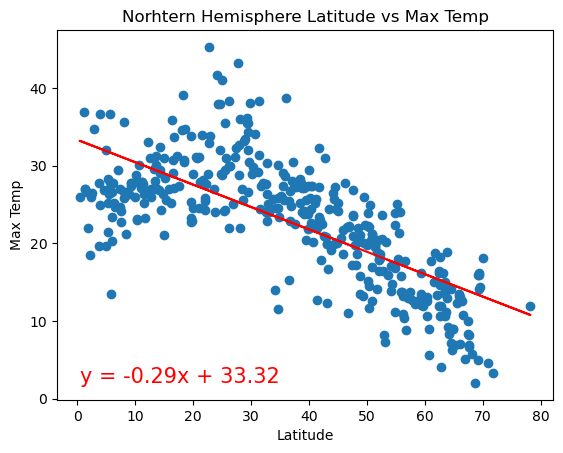

In [15]:
# Linear regression on Northern Hemisphere
get_regress(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Norhtern Hemisphere Latitude vs Max Temp', 'Latitude','Max Temp')

The r-squared is: 0.6881178826358123


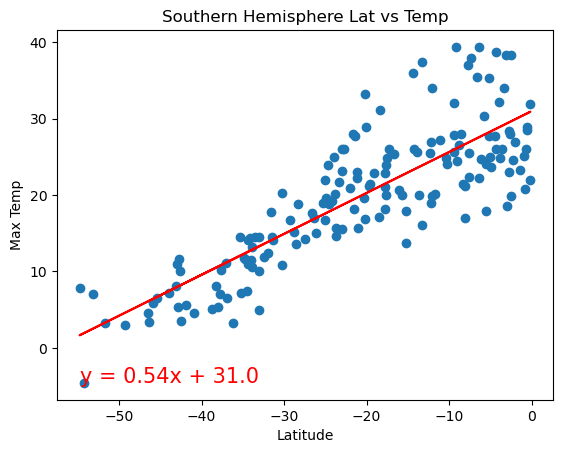

In [16]:
# Linear regression on Southern Hemisphere
get_regress(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], 'Southern Hemisphere Lat vs Temp','Latitude','Max Temp')

**Discussion about the linear relationship:** 

In the Northern Hemisphere, there is a negative correlation between latitude and maximum temperature, where maximum temperatures decrease as latitude increases. Conversely, in the Southern Hemisphere, there is a positive correlation between latitude and maximum temperature, with maximum temperatures increasing as latitude increases.

From this, we can conclude that the closer you are to the equator (latitude 0), the higher the average temperature tends to be. Conversely, as you move further away from the equator in either direction, maximum temperatures generally decrease.

Both graphs exhibit moderate correlations, as indicated by the R-squared values, with the correlation being slightly stronger in the Southern Hemisphere compared to the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 5.4817354162064646e-05


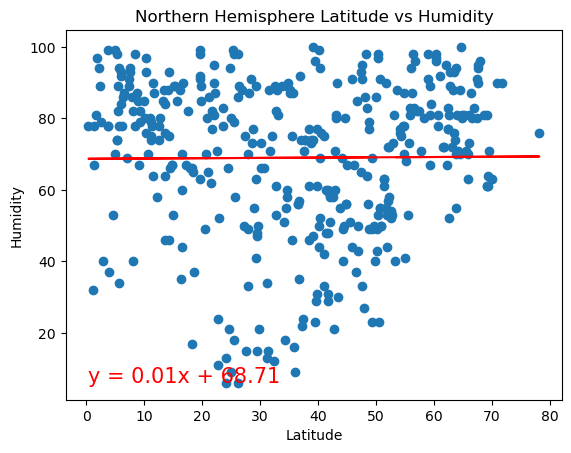

In [17]:
# Northern Hemisphere
get_regress(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Northern Hemisphere Latitude vs Humidity','Latitude','Humidity')

The r-squared is: 0.052959911604864844


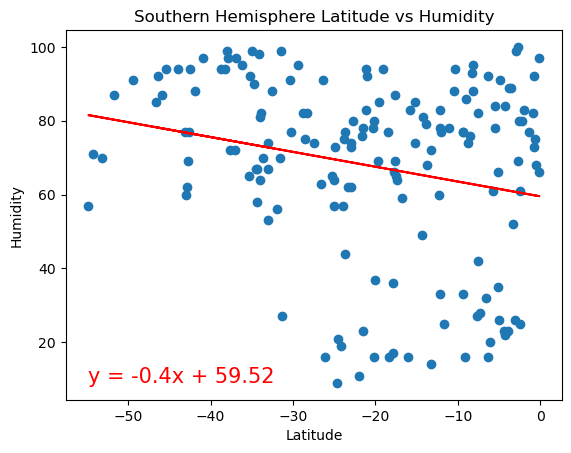

In [18]:
# Southern Hemisphere
get_regress(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Southern Hemisphere Latitude vs Humidity','Latitude','Humidity')

**Discussion about the linear relationship:** 

Latitude and humidity appear to have a very weak correlation in both the Southern and Northern Hemispheres. The data suggests that, regardless of latitude, humidity levels can vary significantly. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00018658313253061022


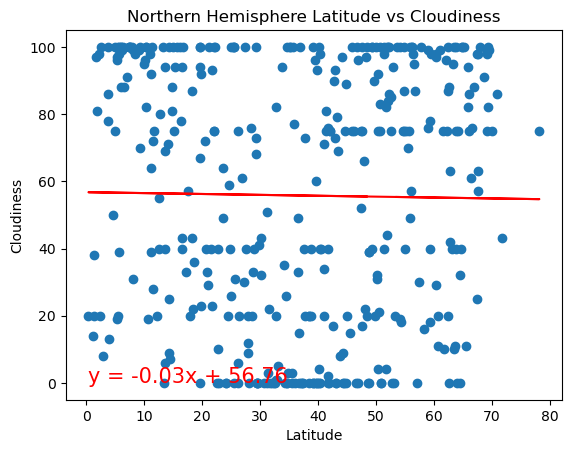

In [19]:
# Northern Hemisphere
get_regress(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Northern Hemisphere Latitude vs Cloudiness','Latitude','Cloudiness')

The r-squared is: 0.002262796485622929


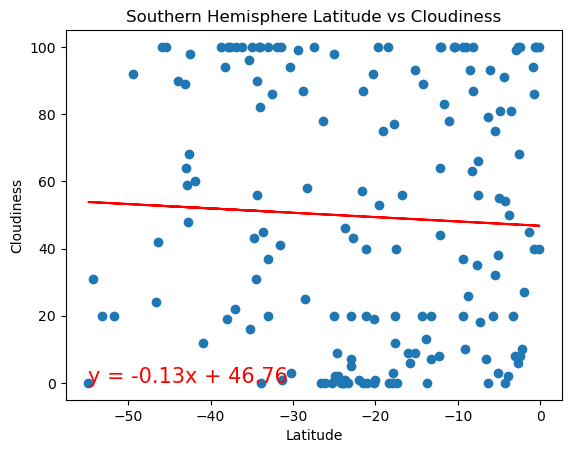

In [20]:
# Southern Hemisphere
get_regress(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Southern Hemisphere Latitude vs Cloudiness', 'Latitude','Cloudiness')

**Discussion about the linear relationship:** 

The analysis shows no correlation between cloudiness and latitude. Regions in both the Southern and Northern Hemispheres exhibit a broad range of cloudiness, regardless of their position on the latitude scale. This suggests that cloudiness is influenced by factors beyond just latitude, leading to diverse cloud cover patterns across the globe.



### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0025895517661034513


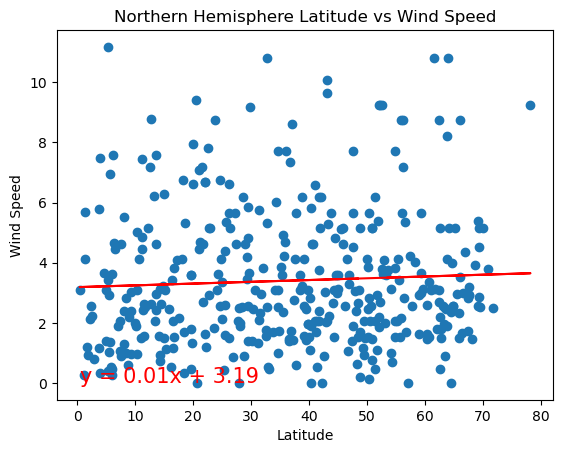

In [21]:
# Northern Hemisphere
get_regress(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Northern Hemisphere Latitude vs Wind Speed','Latitude','Wind Speed')

The r-squared is: 0.016788909896149187


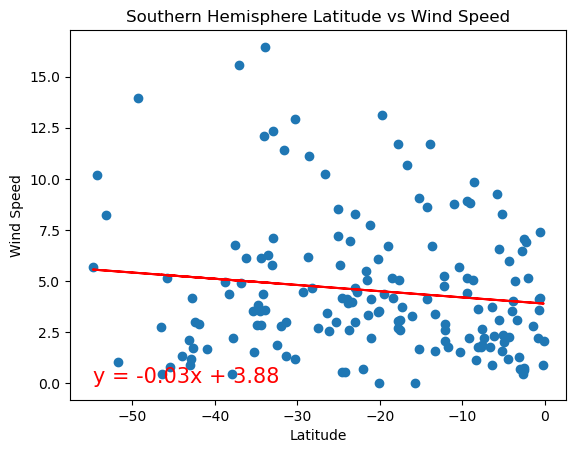

In [22]:
# Southern Hemisphere
get_regress(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Southern Hemisphere Latitude vs Wind Speed','Latitude','Wind Speed')

**Discussion about the linear relationship:** 

The analysis reveals no clear correlation between latitude and wind speed. The data indicates that regions in both the Northern and Southern Hemispheres can experience a wide range of wind speeds, independent of their geographical location. This suggests that other factors, rather than latitude alone, play a more significant role in influencing wind speed across the globe.